# Аксенов Сергей, группа 394, проект 33.        

### Постановка задачи о рюкзаке.

Дано $n$ предметов с весами $w_1,..., w_n$ ∈ $\mathbb{N}$ и стоимостями $c_1,...,c_n$ ∈ $\mathbb{N}$, а также максимально допустимый вес $C$

Требуется найти такое множество $I ⊆ [1..n]$, что $\sum_{i∈I} w_i ≤ С$ и
$\sum_{i∈I} c_i$ максимально.

В данном случае для упрощения реализации будем искать только значение $\sum_{i∈I} c_i$, т.к. процедура восстановления ответа, очевидно, не повлияет на полиномиальность алгоритма.

### Доказательство NP-полноты.

Переформулируем нашу задачу как задачу распознавания.
Пусть на вход также подается число $p_{min}$ - минимальная стоимость. Требуется определить, можно ли выбрать такое множество $I ⊆ [1..n]$, что $\sum_{i∈I} w_i ≤ W$ и
$\sum_{i∈I} c_i \geq p_{min}$.

Принадлежность задачи к классу NP очевидна, поскольку в качестве сертификата достаточно предъявить набор $I$.
Докажем NP-трудность, сведя к нашей задаче задачу о сумме подмножества.
Построим функцию $f:(S,s) \to (P,c,p)$ - функция, осуществляющуе сведение. Она будет устроена так:

$f(S,s) = ((S,S),s,s)$

То есть, для каждого числа $q \in S$ создадим предмет с весом $q$ и стоимостью  $q$. А значения $C$ и $p_{min}$ возьмем равными $s$.
Очевидно, $f$ ~ работает за полиномиальное от длины входа время.
Если исходная задача о сумме подмножества имела решение $S'$, то набор пар предметов с весами, равными числам из $S'$, будет решением задачи о рюкзаке.
В обратную сторону - аналогично.


### Точный псевдополиномиальный алгоритм

Обозначим через $v(k,c)$ минимальный объем, необходимый для того, чтобы уложить предметы с номерами, не превосходящими $k ∈ [1..n]$, общей стоимостью не менее $c$.

1. Положим $v(0,0) = 0,$  $v(0,p) = ∞, p > 0$

2. В цикле по $k$ от 1 до $n$ вычислим $v(k,c)$ для каждого $c$ от $1$ до $\sum_{i∈[1..n]} c_i$:   
      $v(k + 1, c) = min$ { $v(k, c),$  $v(k, c − c_{k+1}) + w_{k+1}$}   

3. В качестве ответа вернем $max$ {$c$  |  $v(n,c) ≤ C$}

In [15]:
INF = 400

def pseudopoly_knapsack(weights, costs, capacity):                            #1
    S = sum(costs)                                                            #2
    N = len(weights)                                                          #3
    w = [[0 for p in range(S + 1)] for k in range(N + 1)]                     #4
    ret = 0                                                                   #5
    for k in range(N):                                                        #6
        for p in range(1, S + 1):                                             #7
            if (k == 0):                                                      #8
                w[k][p] = INF                                                 #9
            w[k+1][p] = min(w[k][p], w[k][max(p-costs[k], 0)] + weights[k])   #10
            if (k == N - 1 and w[k][p] <= capacity and p > ret):              #11
                ret = p                                                       #12
    for p in range(1, S + 1):
        if w[N][p] <= capacity and p > ret:
            ret = p
    return ret                                                                #13

#### Оценка времени работы
Ясно, что время работы приведенного выше алгоритма не превосходит $K n \sum_{i}c_i \leq K n^2 P $ для некоторой константы $K$, то есть алгоритм работает за $O(n^2 P)$.


### Приближенный полиномиальный алгоритм

Пусть даны $w_1,..., w_n$,  $c_1,...,c_n$.  P = $max${$p_i$}.

Обозначим $A_\epsilon = \frac{P}{n(1+\frac{1}{\epsilon})}$.

Положим $c_i'  = ⌈\frac {c_i} { A_\epsilon}⌉$

Запустим вышеописанный псевдополиномиальный алгоритм на исходных {$w_i$}, $C$ и полученном наборе {$c_i'$}.




In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import randint as rnd
import timeit as tm

In [7]:
def round_up(m, eps):
    t = m / eps
    return int(t) 

def approx_knapsack(weights, costs, capacity, eps):
    C = max(costs)
    N = len(weights)
    r = C / ((1.0+1.0/eps)*N)
    #print((1.0/eps + 1)*N)
    norm_costs = [round_up(x, r) for x in costs]
    #print(norm_costs)
    return round(pseudopoly_knapsack(weights, norm_costs, capacity) * r) 
    


#### Оценка времени работы
Время работы алгоритма не превосходит $n^2 max\{p_i'\} ≤ n^3 \frac{(1 + \frac {1} {\epsilon})P}{P} = O(n^3)$

### Доказательство качества приближения

Таким образом, мы получили полностью полиномиальный приближенный алгоритм. Осталось доказать, что полученный алгоритм дает достаточно хорошее приближение

Пусть $R_{\epsilon}$ — общая стоимость набора предметов, который вернул алгоритм. 

$R_{opt}$ - общая стоимость предметов в максимальном наборе.

Заметим, что $R_{\epsilon} ≥ R_{opt} − A_{\epsilon}n$: псевдополиномиальный алгоритм находит точное решение, поэтому отклонение могло появиться только при округлении, однако при округлении могло потеряться не более $1$ на каждом предмете, эта потеря домножается на $A_{\epsilon}$ при обратном переходе от $p_i′$ к  $p_i$.

Кроме того, по условию, $R_{opt} > P$.

Тогда $\frac {R_{\epsilon}} {R_{opt}} ≥ \frac {R_{opt}−R_{\epsilon}} {R_{opt}} = 1 − \frac {nP} {n R_{opt} (1 + \frac {1}{\epsilon})} = \frac {1} {1 + \epsilon}$

Таким образом, $R_{\epsilon} ≥ (1 − \epsilon)R_{opt}$, что и требовалось.

### Тестирование

Для наглядности нарисуем график зависимости времени выполнения от максимальной стоимости предмета при фиксированном количестве предметов.

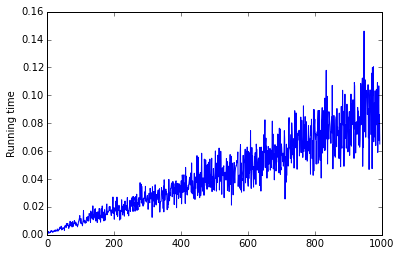

In [25]:
def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

def test_pseudopoly():
    
    
    times = []
    sizes = range(10,50)
    costs = range (6, 1000)
    N = 10
    for C in costs:
        c = rnd(low = 5, high = C, size = N)
        w = rnd(low = 10, high = 40, size = N)
        wrf = wrapper(pseudopoly_knapsack, w, c, 100)
        times.append(tm.timeit(wrf, number = 1))
    return times


a = test_pseudopoly()

plt.figure()
plt.ylabel("Running time").set_rotation(90)
plt.title("")
plt.plot(range(len(a)), a, lw='1.0')
        

Несмотря на заметный разброс, в целом видно, что время выполнения растет линейно с ростом $P$. Применив метод экспоненциального сглаживания, построим более "чистый" график.

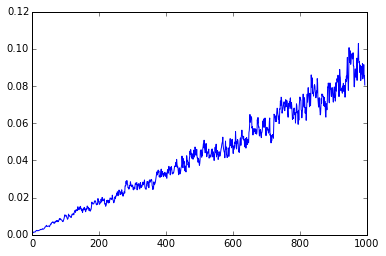

In [30]:
plt.plot(range(len(a)), smooth(a, 0.25), lw='1.0')

In [23]:
def smooth(raw_data, smooth_factor):
    ret = [raw_data[0]]
    for i in range(1, len(raw_data)):
        ret.append(smooth_factor*raw_data[i] + (1-smooth_factor)*ret[i-1])
    return ret

Построим также график зависимости времени выполнения от максимального значения стоимости для приближенного алгоритма (при фиксированных $\epsilon$ и $N$).

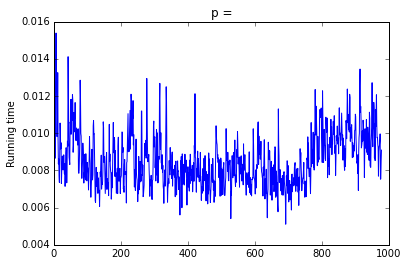

In [39]:
def test_approx():
    
    
    times = []
    costs = range (20, 1000)
    N = 10
    for C in costs:
        c = rnd(low = 5, high = C, size = N)
        w = rnd(low = 10, high = 40, size = N)
        wrf = wrapper(approx_knapsack, w, c, 100, 1/10.0)
        times.append(tm.timeit(wrf, number = 1))
    return times

a = test_approx()

def smooth(raw_data, smooth_factor):
    ret = [raw_data[0]]
    for i in range(1, len(raw_data)):
        ret.append(smooth_factor*raw_data[i] + (1-smooth_factor)*ret[i-1])
    return ret

plt.figure()
plt.ylabel("Running time").set_rotation(90)
plt.title("p = ")
plt.plot(range(len(a)), smooth(a, 0.6), lw='1.0')

Теперь найдем зависимость времени выполнения от $\frac{1}{\epsilon}$.

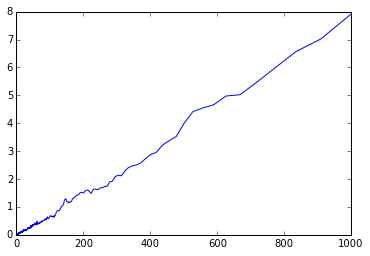

In [35]:
from numpy import *

N = 20

times = []
eps = linspace(0.001, 0.3, 3000)
for ep in eps:
        c = rnd(low = 10, high = 100, size = N)
        w = rnd(low = 10, high = 100, size = N)
        wrf = wrapper(approx_knapsack, w, c, 3000, ep)
        times.append(tm.timeit(wrf, number = 1))
        
plt.figure()
plt.ylabel("Running time").set_rotation(90)
plt.title("p = ")
plt.plot([1/ep for ep in eps], smooth(times, 0.3), lw='1.0')


Из построенных графиков видно, что на протестированныъ данных время работы линейно зависит от $\frac {1} {\epsilon}$, что полностью соответсвует нашим ожиданиям.